# Lecture 19 - More Applications of PCA, Supervised Dimensionality Reduction & Manifold Learning

---

# Image Compression

## Example: Eigenfaces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(return_X_y=False)
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [9]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
X = faces.data # data matrix
t = faces.target # target label

X.shape, t.shape # 400 images, each of size 64x64=4096 pixels

((400, 4096), (400,))

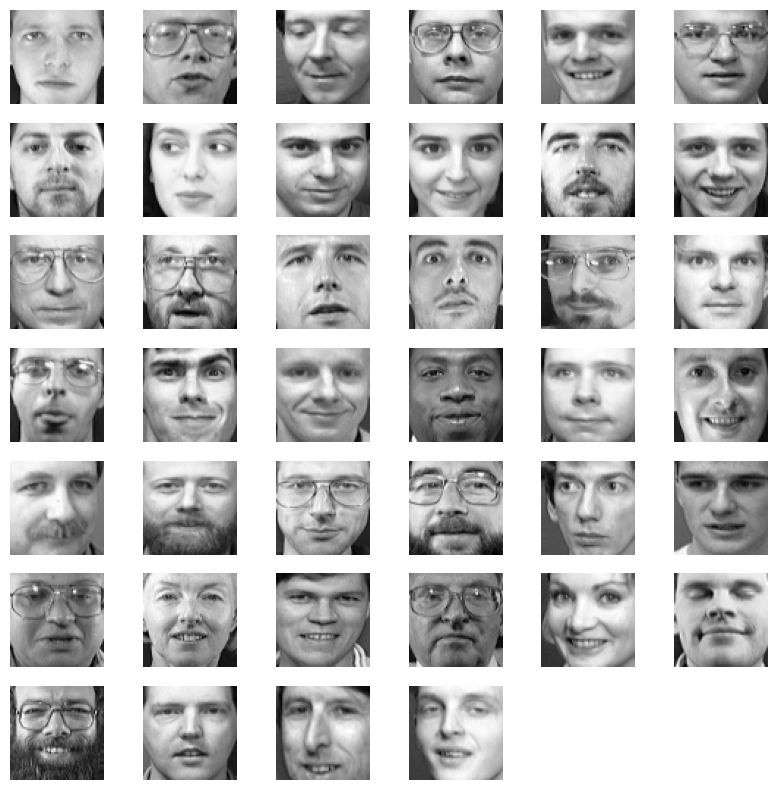

In [10]:
fig = plt.figure(figsize=(10,10))
for i in range(40):
    fig.add_subplot(7,6,i+1)
    idx = np.random.choice(np.where(t==i)[0])
    plt.imshow(X[idx,:].reshape(64,64), cmap='gray')
    plt.axis('off')

In [11]:
np.unique(t, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10], dtype=int64))

In [12]:
X_train, X_test, t_train, t_test = train_test_split(X, t, 
                                                    test_size=0.2, 
                                                    random_state=42)

X_train.shape, t_train.shape, X_test.shape, t_test.shape

((320, 4096), (320,), (80, 4096), (80,))

Olivetti images are:

64 × 64 = 4096 features per image

A typical PCA rule is:

“Keep 5–15% of the original features.”

10% of 4096 ≈ 410

8% of 4096 ≈ 320 - train

In [13]:
dim_red = Pipeline([('scaler', StandardScaler()),
                   ('pca', PCA(n_components=320))])

dim_red

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=320))])

In [14]:
dim_red.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=320))])

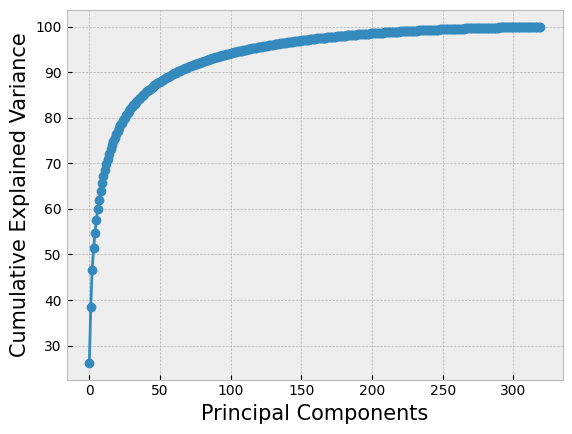

In [15]:
plt.plot(100*np.cumsum(dim_red.named_steps.pca.explained_variance_ratio_), '-o')
plt.xlabel('Principal Components',size=15)
plt.ylabel('Cumulative Explained Variance', size=15);

What the plot shows:

The first ~50 components already capture 80% of the data

Around ~100 components capture 90%

After ~200 components, the curve becomes almost flat → adding more gives very little extra information

In [ ]:
np.where(np.cumsum(dim_red.named_steps.pca.explained_variance_ratio_)>=0.9)[0] #This returns all indices where the cumulative variance is ≥ 90%.

array([ 62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 24

In [20]:
np.cumsum(dim_red.named_steps.pca.explained_variance_ratio_)[62]

0.900588

In order to explain 90% of the variance in the data, we need to preserve 63 principal components.

Let's project to 2-D so we can plot it:

A 2-D scatter plot needs exactly 2 numbers per point

PCA with n_components=2 gives each sample two coordinates:

PC1

PC2

In [22]:
dim_red_2d = Pipeline([('scaler', StandardScaler()),
                       ('pca', PCA(n_components=2))])

dim_red_2d

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

In [23]:
dim_red_2d.fit(X_train)



Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

In [25]:
ypca = dim_red_2d.fit_transform(X_train)
ypca

array([[-2.70944252e+01,  7.83209686e+01],
       [ 6.72148705e+00, -3.20074348e+01],
       [ 3.99888039e+01,  1.73221912e+01],
       [ 1.29644947e+01, -7.38607073e+00],
       [-4.52637339e+00, -1.58571501e+01],
       [-2.60622540e+01,  1.86051941e+01],
       [ 5.68955183e+00, -2.67705479e+01],
       [ 3.91179771e+01, -7.18105316e+00],
       [-1.83818436e+01, -3.65548897e+01],
       [-7.51024723e+00, -7.72771215e+00],
       [ 1.68508797e+01,  5.27771645e+01],
       [ 6.57840424e+01, -9.21890068e+00],
       [-2.87795010e+01, -3.61557341e+00],
       [-4.03316078e+01, -5.21210718e+00],
       [-6.17820644e+00, -3.39243150e+00],
       [-8.28484058e+00, -3.27676620e+01],
       [-2.17161827e+01, -1.02336206e+01],
       [ 6.20750847e+01, -6.58074558e-01],
       [ 2.36089039e+01,  5.85865974e+01],
       [-5.96735725e+01, -2.88407478e+01],
       [-1.96428280e+01,  2.07643871e+01],
       [-3.34927330e+01,  1.32931404e+01],
       [ 8.55713081e+00, -1.05650301e+01],
       [-4.

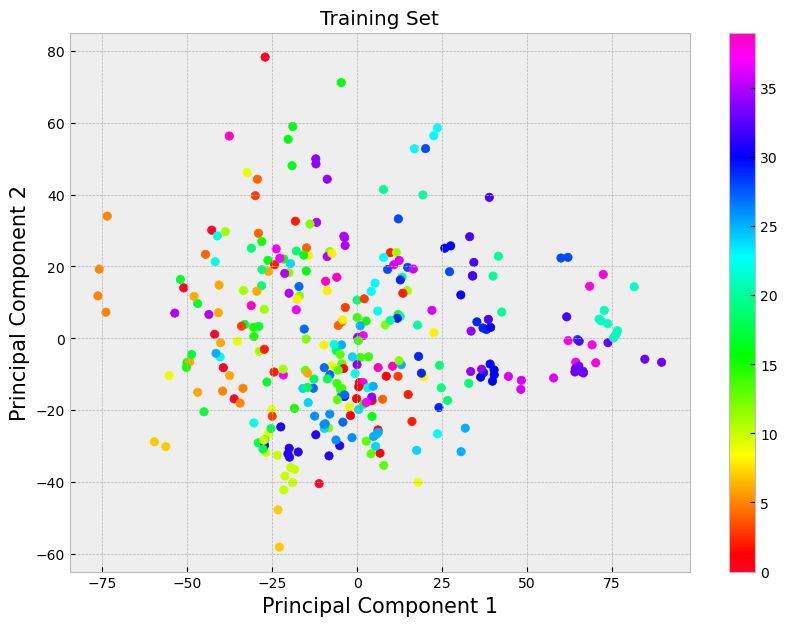

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(ypca[:,0], ypca[:,1], c=t_train, cmap=plt.cm.gist_rainbow)
plt.xlabel('Principal Component 1', size=15)
plt.ylabel('Principal Component 2', size=15)
plt.title('Training Set')
plt.colorbar();

Not that the 40 classes are overlapping in the linear projection space. This is because PCA is **unsupervised**, it does use the class labels *anywhere* in finding the matrix for linear projection.

To apply this transformation in the test set, simply multiply the resultant modal matrix with the scaled test set:

In [26]:
# Transform the test set using the linear transformation found with the training data
ypca_test = dim_red_2d.transform(X_test)

ypca_test.shape

(80, 2)

In [27]:
ypca_test

array([[ 13.2673435 ,  38.752693  ],
       [ 59.382866  ,  10.292743  ],
       [-32.801197  ,  -6.606206  ],
       [ 77.86476   ,   3.4806166 ],
       [ 21.509811  , -40.16344   ],
       [ -8.268763  ,  11.77495   ],
       [ 64.00316   ,   1.7863787 ],
       [-33.54249   ,  -3.0781236 ],
       [ -9.626152  , -21.551834  ],
       [-11.12121   ,  45.967407  ],
       [-19.787346  ,  -9.077597  ],
       [ 48.030052  , -11.163881  ],
       [-76.81553   ,  24.743196  ],
       [-48.129852  , -31.04309   ],
       [  2.6499858 , -29.568161  ],
       [ 13.328286  , -19.91267   ],
       [  9.894091  , -13.362189  ],
       [ -2.4443336 , -13.2623005 ],
       [  6.804084  ,   8.983894  ],
       [ 70.80363   ,   9.413528  ],
       [-53.763264  , -24.699272  ],
       [  1.9308505 , -28.521421  ],
       [-33.323677  ,  18.783146  ],
       [  1.2481086 , -17.005035  ],
       [-45.370163  ,  -3.9758565 ],
       [-39.185486  ,  39.897102  ],
       [ 15.419554  ,   7.024021  ],
 

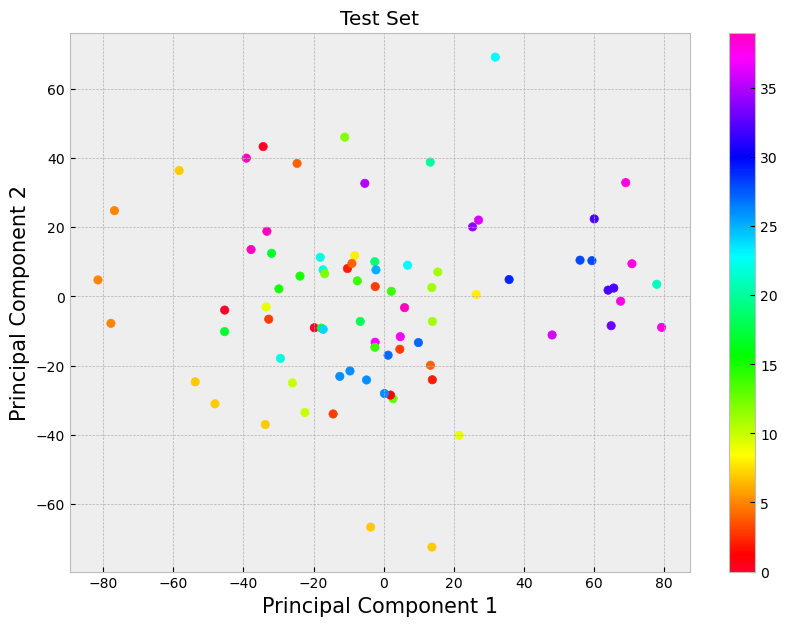

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(ypca_test[:,0], ypca_test[:,1], c=t_test, cmap=plt.cm.gist_rainbow)
plt.xlabel('Principal Component 1', size=15)
plt.ylabel('Principal Component 2', size=15)
plt.title('Test Set')
plt.colorbar();

You can access the linear transformation $\mathbf{A} = \mathbf{U}^T$ using the method ```components_```:

In [28]:
A = dim_red_2d.named_steps.pca.components_

A.shape

(2, 4096)

Note that the eigenvectors are described in the original space, that is, they are 4096-dimensional!

Since we are working with images, we can reshape them back to a $64 \times 64$ image and see what are the regions in the image with maximum explained variance! This is called the **eigenfaces**.

Let's now recover 16 eigenvectors and plot them as images:

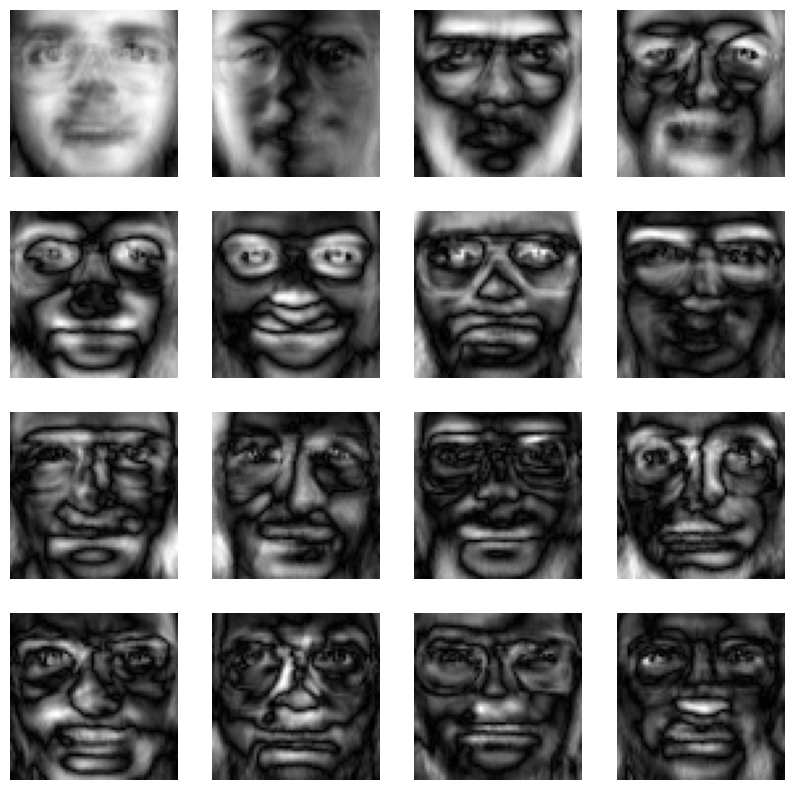

In [29]:
n_components = 16

# Dimensionality reduction pipeline
dim_red = Pipeline([('scaler', StandardScaler()),
                   ('pca', PCA(n_components=n_components))])
dim_red.fit(X_train)

# Linear projections
ypca = dim_red.fit_transform(X_train)

# Visualization of eigenvectors/the new features/principal components
fig=plt.figure(figsize=(10,10))
for i in range(n_components):
    fig.add_subplot(4,4,i+1)
    plt.imshow(abs(dim_red.named_steps.pca.components_[i,:].reshape(64,64)),cmap='gray')
    plt.axis('off')

The eigenvectors are describing the regions in the 64x64 image that explain the most variance. the more eigenvectors are kept, the better a reconstruction image will be produced.

Since the projection is given by:

$$\mathbf{Y} = \mathbf{A}\mathbf{X}$$

In order to recover $\mathbf{X}$, we need to left-multiply by the pseudo-inverse of $\mathbf{A}$:

$$\hat{\mathbf{X}} = \mathbf{A}^\dagger\mathbf{Y}$$

In ```scikit-learn```, this step can be computed by using the method ```inverse_transform```.

-------------------------------------
You took your original image (X) → applied PCA → got compressed data (Y).

This is written as:

Y = A X


X = original image (4096 pixels)

A = PCA transformation matrix

Y = compressed version (e.g., 100 PCA components)

Now the question is:

👉 How do we go back from Y to X?
(How do we reconstruct the image?)

To reverse the transformation, we need something like:

X ≈ A⁺ Y


Where A⁺ is the pseudo-inverse of A (because A is not square).


fittransfrom above 

inverse transform below

-------------------------------------

In [30]:
ypca.shape

(320, 16)

In [31]:
# Reconstruction
X_reconst = dim_red.inverse_transform(ypca)

X_reconst.shape

(320, 4096)

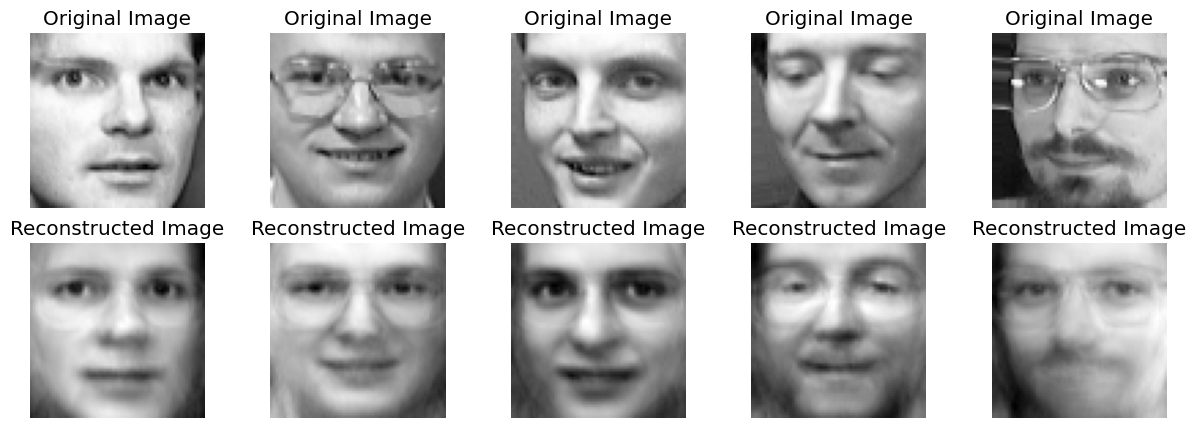

In [36]:
N = 5
idx = np.random.choice(range(X_reconst.shape[0]),replace=False,size=N)

fig = plt.figure(figsize=(15,5))

j=1
for i in range(N):
    fig.add_subplot(2,N,j)
    plt.imshow(X_train[idx[i],:].reshape(64,64), cmap='gray')
    plt.axis('off')
    plt.title('Original Image');

    fig.add_subplot(2,N,j+N)
    plt.imshow(X_reconst[idx[i],:].reshape(64,64), cmap='gray')
    plt.axis('off')
    plt.title('Reconstructed Image');
    j+=1

Putting it all together:

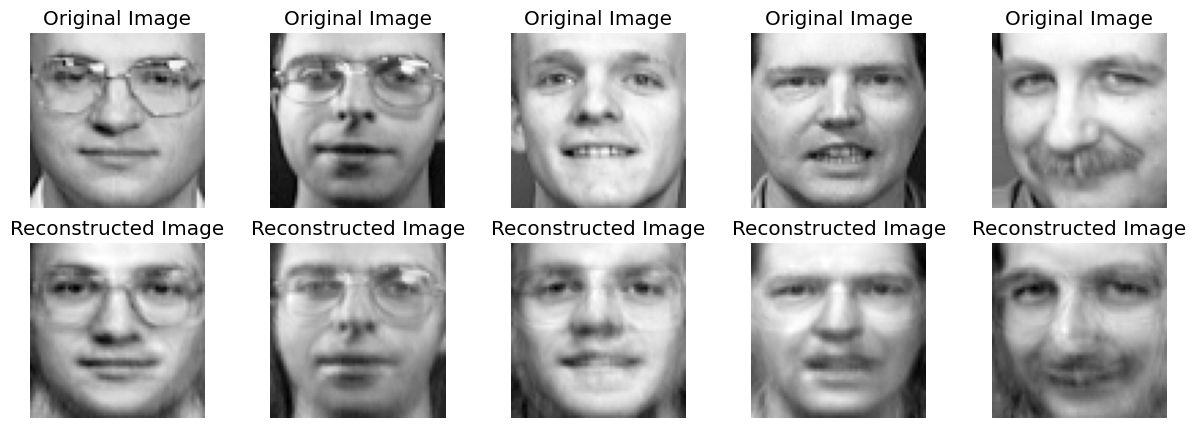

In [38]:
n_components = 63

# Dimensionality reduction pipeline
dim_red = Pipeline([('scaler', StandardScaler()),
                   ('pca', PCA(n_components=n_components))])
dim_red.fit(X_train)

# Linear projections
ypca = dim_red.fit_transform(X_train)

# Reconstruction
X_reconst = dim_red.inverse_transform(ypca)

# Visualizations
N = 5 # number of images to display
fig = plt.figure(figsize=(15,5))
idx = np.random.choice(range(X_reconst.shape[0]),replace=False,size=N)
j=1
for i in range(N):
    fig.add_subplot(2,N,j)
    plt.imshow(X_train[idx[i],:].reshape(64,64), cmap='gray')
    plt.axis('off')
    plt.title('Original Image');

    fig.add_subplot(2,N,j+N)
    plt.imshow(X_reconst[idx[i],:].reshape(64,64), cmap='gray')
    plt.axis('off')
    plt.title('Reconstructed Image');
    j+=1

# PCA as a preprocessing step

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
import time

In [40]:
# Model without Dimensionality reduction
model = Pipeline([('scaler', StandardScaler()),
                  ('clf', LogisticRegression())])
start = time.time()
model.fit(X_train, t_train)
end = time.time()
print('Training time: ', end-start, ' ms')

Training time:  0.6019587516784668  ms


In [41]:
model_dim_red = Pipeline([('scaler', StandardScaler()),
                          ('pca', PCA(n_components=0.9)),
                          ('clf', LogisticRegression())])
start = time.time()
model_dim_red.fit(X_train, t_train)
end = time.time()
print('Training time: ', end-start, ' ms')

Training time:  0.2179427146911621  ms


In [42]:
model.score(X_test, t_test)

0.975

In [43]:
model_dim_red.score(X_test, t_test)

0.975

---
---
---

# Supervised Linear Dimensionality Reduction via FLDA

## FLDA: Fisher's Linear Discriminant Analysis (or LDA)

A very popular type of a linear discriminant is the **Fisher's Linear Discriminant**.

* Given two classes, we can compute the mean of each class:

\begin{align*}
\mathbf{\overrightarrow{m}}_1 &= \frac{1}{{N}_1}\sum_{n\in C_1} \mathbf{\overrightarrow{x}_n}\\
\mathbf{\overrightarrow{m}_2} &= \frac{1}{N_2}\sum_{n\in C_2} \mathbf{\overrightarrow{x}_n}
\end{align*}

We can maximize the separation of the means:

\begin{align*}
m_2 - m_1 = \mathbf{\overrightarrow{w}}^T(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)
\end{align*}

* $\mathbf{\overrightarrow{w}}^T\mathbf{\overrightarrow{x}}$ takes a $D$ dimensional data point and projects it down to 1-D with a weight sum of the original features. We want to find a weighting that maximizes the separation of the class means. 

* Not only do we want well separated means for each class, but we also want each class to be *compact* to minimize overlap between the classes. 

* Consider the *within class variance:*

\begin{align*}
s_k^2 = \sum_{n \in C_k} (y_n - m_k)^2 &= \sum_{n \in C_k} (\mathbf{\overrightarrow{w}}^T\mathbf{\overrightarrow{x}}_n - m_k)^2 \\
&= \mathbf{\overrightarrow{w}}^T \sum_{n \in C_k} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}_k}) (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}_k})^T \mathbf{\overrightarrow{w}}
\end{align*}

* So, we want to minimize within class variance and maximize between class separability. How about the following objective function:

\begin{align*}
J(\mathbf{w}) &= \frac{(m_2 - m_1)^2}{s_1^2 + s_2^2}\\
      &= \frac{\mathbf{\overrightarrow{w}}^T(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)^T\mathbf{\overrightarrow{w}}}{\sum_{n \in C_1} (\mathbf{\overrightarrow{w}}^T\mathbf{\overrightarrow{x}}_n - m_1)^2 + \sum_{n \in C_2} (\mathbf{\overrightarrow{w}}^T\mathbf{\overrightarrow{x}}_n - m_2)^2}\\
	  &= \frac{\mathbf{\overrightarrow{w}}^T(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)^T\mathbf{\overrightarrow{w}}}{\mathbf{\overrightarrow{w}}^T\left(\sum_{n \in C_1} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_1)^T + \sum_{n \in C_2} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_2)(\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_2)^T\right)\mathbf{\overrightarrow{w}}}\\
	  &= \frac{\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}}}{\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}}}
\end{align*}

where

\begin{align*}
S_B = (\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)^T
\end{align*}

and 

\begin{align*}
S_W= \frac{1}{N_1}\sum_{n \in C_1} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_1)^T + \frac{1}{N_2}\sum_{n \in C_2} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_2)(\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_2)^T
\end{align*}

* Ok, so let's optimize:

\begin{align*}
\frac{\partial J(\mathbf{\overrightarrow{w}})}{\partial \mathbf{\overrightarrow{w}}} &= \frac{2(\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})\mathbf{S}_B\mathbf{\overrightarrow{w}} - 2(\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}})\mathbf{S}_W\mathbf{\overrightarrow{w}}}{(\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})^2} = 0 \\
0 &= \ \frac{\mathbf{S}_B\mathbf{\overrightarrow{w}}}{(\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})} -\frac{(\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}})\mathbf{S}_W\mathbf{\overrightarrow{w}}}{(\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})^2} \\
 (\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})\mathbf{S}_B\mathbf{\overrightarrow{w}} &= (\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}})\mathbf{S}_W\mathbf{\overrightarrow{w}} \\
 \mathbf{S}_B \mathbf{\overrightarrow{w}} &= \frac{\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}}}{\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}}} \mathbf{S}_W\mathbf{\overrightarrow{w}}\\
 \mathbf{S}_W^{-1}\mathbf{S}_B\mathbf{\overrightarrow{w}} &= \lambda\mathbf{\overrightarrow{w}}
\end{align*}

where the scalar $\lambda = \frac{\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}}} { \mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}}}$

#### *Does this look familiar?*

This is the generalized eigenvalue problem!

* So the direction of projection correspond to the eigenvectors of $\mathbf{S}_W^{-1}\mathbf{S}_B$ with the largest eigenvalues.

The solution is easy when $S_w^{-1} = (\Sigma_1 + \Sigma_2)^{-1}$ exists.

In this case, if we use the definition of $S_B = (\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)^T$:

\begin{align*}
S_W^{-1}S_B\mathbf{\overrightarrow{w}} &= \lambda\mathbf{\overrightarrow{w}}\\
S_W^{-1}(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1)^T\mathbf{\overrightarrow{w}} &= \lambda\mathbf{\overrightarrow{w}}
\end{align*}

Noting that $\alpha = (\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1)^T\mathbf{\overrightarrow{w}}$ is a constant, this can be written as:

$$S_W^{-1}(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1) = \frac{\lambda}{\alpha}\mathbf{\overrightarrow{w}}$$

* Since we don't care about the magnitude of $\mathbf{\overrightarrow{w}}$:

$$\mathbf{\overrightarrow{w}}^* = S_W^{-1}(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1) = (\Sigma_1 + \Sigma_2)^{-1}(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1)$$

Make sure $\mathbf{\overrightarrow{w}}^*$ is a unit vector by taking: $\mathbf{\overrightarrow{w}}^* \leftarrow \frac{\mathbf{\overrightarrow{w}}^*}{\Vert\mathbf{\overrightarrow{w}}^*\Vert}$

* Note that if the within-class covariance, $S_W$, is isotropic, so that $S_W$ is proportional to the unit matrix, we find that $\mathbf{\overrightarrow{w}}$ is proportional to the difference of the class means.

* This result is known as *Fisher's linear discriminant*, although strictly it is not a discriminant but rather a specific choice of direction for projection of the data down to one dimension. However, the projected data can subsequently be used to construct a discriminant, by choosing a threshold $y_0$ so that we classify a new point as belonging to $C_1$ if $y(x) \geq y_0$ and classify it as belonging to $C_2$ otherwise.

Also, note that:
* For a classification problem with Gaussian classes of equal covariance $\Sigma_i=\Sigma$, the boundary is the plane of normal:
$$\mathbf{\overrightarrow{w}} = \Sigma^{-1}(\mathbf{\overrightarrow{m}}_i-\mathbf{\overrightarrow{m}}_j)$$

* If $\Sigma_2=\Sigma_1$, this is also the LDA solution.

This gives two different **interpretations** of LDA:

* It is optimal *if and only if* the classes are Gaussian and have equal covariance.

* A classifier on the LDA features, is equivalent to the boundary after the approximation of the data by two Gaussians with equal covariance.

The final discriminant decision boundary is $\mathbf{\overrightarrow{y}} = \mathbf{\overrightarrow{w}}^*\mathbf{\overrightarrow{x}} + w_0$

The *bias* term $w_0$ can be defined as:

$$w_0 = \frac{1}{2}\left(\frac{1}{N_1}\sum_{n\in C_1}\overrightarrow{x}_n + \frac{1}{N_2}\sum_{n\in C_2}\overrightarrow{x}_n \right)^T\mathbf{\overrightarrow{w}}^*$$

* An extension to multi-class problems has a similar derivation.

**Limitations** of LDA:

1. LDA produces at most $C-1$ feature projections, where $C$ is the number of classes.

2. If the classification error estimates establish that more features are needed, some other method must be employed to provide those additional features.

3. LDA is a parametric method (it assumes unimodal Gaussian likelihoods).

4. If the distributions are significantly non-Gaussian, the LDA projections may not preserve complex structure in the data needed for classification.

5. LDA will also fail if discriminatory information is not in the mean but in the variance of the data.

A popular variant of LDA are the **Multi-Layer Perceptrons** (or MLPs).

Here is **FLDA / LDA explained in SUPER SIMPLE language**, like you're learning it for the first time.
No math fear. No heavy formulas. Just pure intuition 👇🔥

---

# ⭐ **WHAT IS LDA (Fisher’s Linear Discriminant Analysis)?**

LDA is a **supervised dimensionality reduction** method.

Meaning:

👉 It reduces features **using class labels**
👉 Unlike PCA (which ignores labels)

LDA tries to find **the best direction** to project data so that **different classes are separated as much as possible**.

---

# ⭐ **THE GOAL OF LDA (simple version)**

LDA wants to find a line (or direction) where:

### ✔ Class means are **far apart** (good separation)

### ✔ Each class’s points are **close to each other** (compact clusters)

### → This gives **maximum class separation**

So:

📌 **Between-class distance should be big**
📌 **Within-class distance should be small**

---

# ⭐ **HOW LDA DOES IT (baby version)**

Imagine you have TWO classes:

* Class 1 (blue points)
* Class 2 (red points)

LDA looks for a direction **w** (a vector) such that:

### 1️⃣ When you project points onto this line…

* Blue points gather together
* Red points gather together
* The groups are far from each other

### 2️⃣ So your classification becomes easier

→ You just draw a threshold between the two projected groups.

---

# ⭐ **WHAT ARE THE MEANS?**

Each class has a mean point:

* Mean of class 1 = average of blue points
* Mean of class 2 = average of red points

LDA uses the difference between these means to separate classes.

---

# ⭐ **WHAT IS WITHIN-CLASS VARIANCE?**

This describes how **spread out** each class is.

We want it:

❌ NOT too large
❌ NOT overlapping
✔ as tight as possible

Tight clusters = easier classification.

---

# ⭐ **THE KEY IDEA**

LDA solves this optimization:

```
Make (distance between class means) big
And (spread inside each class) small
```

Mathematically:

```
J(w) = (between-class variance) / (within-class variance)
```

LDA **maximizes this ratio** to find the best direction **w**.

---

# ⭐ **MAGIC RESULT (Final formula)**

The perfect direction w* is:

```
w* = Sw^-1 (m2 – m1)
```

Meaning:

👉 You take difference of class means
👉 Multiply with inverse of within-class scatter
👉 You get the best projection direction

You don't need to compute it by hand—scikit-learn does it.

---

# ⭐ **WHAT IS SB AND SW?**

In simple words:

* **SB (between-class scatter)** = how far the class centers are
* **SW (within-class scatter)** = how spread each class is

LDA wants:

* **SB BIG**
* **SW SMALL**

---

# ⭐ **LDA vs. PCA (in 5 seconds)**

| PCA                            | LDA                                 |
| ------------------------------ | ----------------------------------- |
| Unsupervised                   | Supervised                          |
| Maximizes data variance        | Maximizes class separation          |
| Finds directions of max spread | Finds directions separating classes |
| Ignores labels                 | Uses labels                         |

---

# ⭐ **LIMITATIONS (simple)**

1. LDA can produce at most **C–1 features** for C classes
   (If 40 classes → max 39 LDA dimensions)

2. It assumes data in each class is Gaussian
   → If not, results may be worse.

3. If classes overlap a lot → LDA won’t help much.

4. If class covariance is not equal → LDA is not optimal.

---

# ⭐ **SUPER EASY SUMMARY (learn this!)**

**LDA finds the best direction to separate classes by:**

* Making class means far apart
* Making classes internally tight
* Using class labels
* Producing up to C–1 features
* Giving great low-dimensional representations for classification

---

If you want, I can make a **1-slide summary**, **handwritten-style notes**, or a **visual example** with a picture!


In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [45]:
# Dimensionality Reduction: PCA
pca = Pipeline([('scaler', StandardScaler()),
                ('pca', PCA(n_components=2))])
pca.fit(X_train)
y_train_pca = pca.transform(X_train)

# Dimensionality Reduction: LDA
lda = Pipeline([('scaler', StandardScaler()),
                ('lda', LDA(n_components=2))])
lda.fit(X_train, t_train)
y_train_lda = lda.transform(X_train)

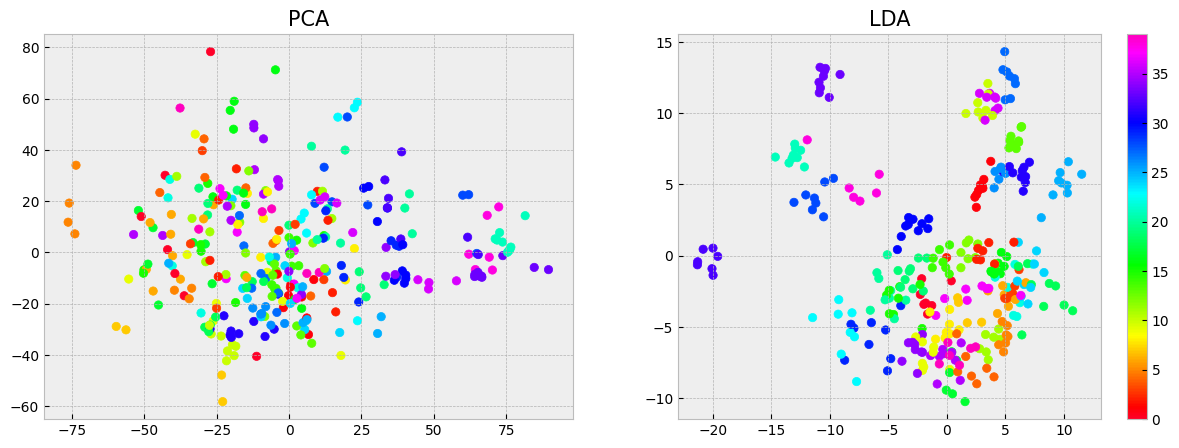

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1); plt.title('PCA', fontsize=15)
plt.scatter(y_train_pca[:,0], y_train_pca[:,1], c=t_train, cmap=plt.cm.gist_rainbow)
plt.subplot(1,2,2); plt.title('LDA', fontsize=15)
plt.scatter(y_train_lda[:,0], y_train_lda[:,1], c=t_train, cmap=plt.cm.gist_rainbow)
plt.colorbar();

---
---
---

# Manifold Learning (Non-Linear Dimensionality Reduction)

As we have already noted, many natural sources of data correspond to low-dimensional, possibly noisy, non-linear manifolds embedded within the higher dimensional observed data space.Capturing this property explicitly can lead to improved density modeling compared with more general methods.

PCA and LDA are often used to project a data set onto a lower-dimensional space. However both of them assume that the data samples live in an underlying linear manifold.

There are other dimensionality reduction techniques that do not assume the manifold is linear. They include:
1. Multi-Dimensional Scaling (MDS)
2. Isometric Mapping (ISOMAP)
3. Locally Linear Embedding (LLE)
4. t-Distributed Stochastic Neighbor Embedding (t-SNE)

---

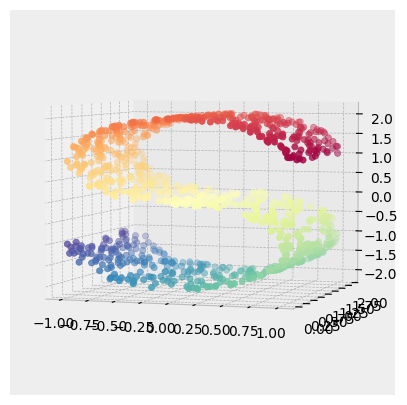

In [47]:
from sklearn.datasets import make_s_curve

n_points = 1000
X_scurve, color = make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig=plt.figure(figsize=(15, 5))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(X_scurve[:, 0], X_scurve[:, 1], X_scurve[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

---

# Multi-Dimensional Scaling (MDS)

Another linear technique with a similar aim is **multidimensional scaling**, or **MDS**. It finds a low-dimensional projection of the data such as to **preserve the pairwise distances between data points**, and involves finding the eigenvectors of the distance matrix. 

Consider a set of mean-centered observations $X=\{x_1,x_2,\dots,x_N\}$ where $x_i\in\mathbb{R}^D$. By mean-centered samples $X$, I mean that $\mu_j = \sum_{i=1}^N x_{ij} = 0, \forall j=1,2,\dots,D$.

Consider the **proximity matrix** $D$ that stores pairwise distances of data points $d_{ij} = \text{distance}(x_i,x_j)$:

\begin{align*}
D = \left[\begin{array}{cccc}
d_{11} & d_{12} & \cdots & d_{1N}\\
d_{21} & d_{22} & \cdots & d_{2N}\\
\vdots & \vdots & \ddots & \vdots\\
d_{N1} & d_{N2} & \cdots & d_{NN}
\end{array}\right]
\end{align*}

Note that $D$ is an $N\times N$ symmetric matrix.

Given an assumed Euclidean proximity matrix, $D$, the **goal** of MDS is to find a set of points, $Y$, that have the same proximity matrix in an M-dimensional space, where $M<D$.

* MDS preserves the global data structure.

* MDS can use any distance metric to compute the pairwise distances between points.

* There is the need to store the proximity matrix (half of it, since it is symmetric). Thus requiring a significant computational and storage resources for large datasets. 
    * There are $N(N-1)/2$ distance computations, where $N$ is the number of samples.

* **Classical MDS** refers to MDS when using Euclidean distances.

* In the case where the pairwise distances are computed with the Euclidean distance metric, MDS gives equivalent results to PCA. Therefore, MDS is a generalization of PCA.

---